# 3 회귀 알고리즘과 모델 규제
## 3-3 특성 공학과 규제

In [3]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full =df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import  train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,
                                                                   perch_weight,
                                                                   random_state=42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9903183436982125


In [14]:
print(lr.score(test_poly,test_target))

0.9714559911594203


In [15]:
poly = PolynomialFeatures(degree=5,
                          include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [17]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9999999999997062


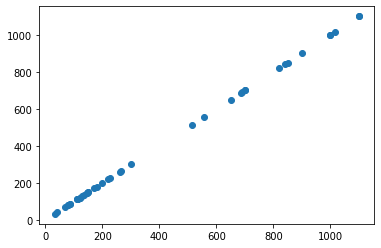

In [21]:
plt.scatter(train_target,lr.predict(train_poly))

In [23]:
# 규제

from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
ssc.fit(train_poly)
train_scaled = ssc.transform(train_poly)
test_scaled = ssc.transform(test_poly)

In [24]:
from sklearn.linear_model import Ridge
# Ridge
# default alpha = 1.0
# alpha가 작으면 과소적합 방향으로
# -> 규제가 증가
# alpha가 크면 과대적합 방향으로
# -> 규제가 감소

ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [26]:
print(ridge.score(test_scaled,test_target))

0.979069397761538


In [28]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [29]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))    

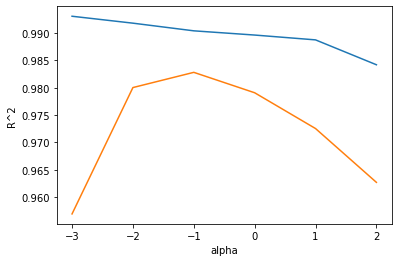

In [30]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386896


In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [33]:
print(lasso.score(test_scaled,test_target))

0.9800593698421884


In [34]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(train_scaled,train_target)
    
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

/opt/homebrew/Caskroom/miniforge/base/envs/conda_venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


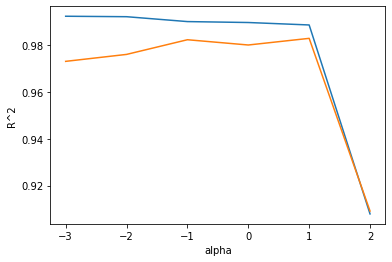

In [36]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [40]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131866
0.9824470598706695


In [41]:
print(np.sum(lasso.coef_==0))

40


In [42]:
lasso.

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [44]:
poly.get_feature_names_out()

(55,)

In [46]:
np.column_stack((poly.get_feature_names_out(),lasso.coef_))

array([['x0', 0.0],
       ['x1', 0.0],
       ['x2', 0.0],
       ['x0^2', 12.148524528612896],
       ['x0 x1', 55.4485639899786],
       ['x0 x2', 42.231007986955724],
       ['x1^2', 0.0],
       ['x1 x2', 0.0],
       ['x2^2', 13.705961912334866],
       ['x0^3', 0.0],
       ['x0^2 x1', 43.21859520142933],
       ['x0^2 x2', 5.703377504347024],
       ['x0 x1^2', 47.462545357880884],
       ['x0 x1 x2', 7.423094253142802],
       ['x0 x2^2', 11.858233650945506],
       ['x1^3', 0.0],
       ['x1^2 x2', 0.0],
       ['x1 x2^2', 13.530381934881628],
       ['x2^3', 21.221113563400635],
       ['x0^4', 0.0],
       ['x0^3 x1', 0.0],
       ['x0^3 x2', 0.0],
       ['x0^2 x1^2', 0.0],
       ['x0^2 x1 x2', 0.0],
       ['x0^2 x2^2', 0.0],
       ['x0 x1^3', 18.66993031631119],
       ['x0 x1^2 x2', 0.0],
       ['x0 x1 x2^2', 0.0],
       ['x0 x2^3', 0.0],
       ['x1^4', 15.810417779446151],
       ['x1^3 x2', 0.0],
       ['x1^2 x2^2', 0.0],
       ['x1 x2^3', 0.0],
       ['x2^4',

In [47]:
pd.DataFrame(np.column_stack((poly.get_feature_names_out(),lasso.coef_)),
             columns=['variable','coeff'])

,variable,coeff
0,x0,0.0
1,x1,0.0
2,x2,0.0
3,x0^2,12.148525
4,x0 x1,55.448564
5,x0 x2,42.231008
6,x1^2,0.0
7,x1 x2,0.0
8,x2^2,13.705962
9,x0^3,0.0
